In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.image as image

import sys
sys.path.append('./')
from utils import Dummyfier, prepare, evaluate_clf, uplift

from IPython.core.debugger import set_trace

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
test = pd.read_csv('./test_data/test_dataset.csv', sep='>', na_values='<null>', 
                 parse_dates=['LAST_CARD_STATUS_DT', 'LAST_CONTR_STATUS_DT', 'BIRTH_DATE', 'START_DATE'])

In [5]:
test_new =  pd.read_csv('./test_data_04_2018/test_04_2018.csv/CD_ALL_2018-03-30.csv', sep='>', na_values='<null>', 
                 parse_dates=['LAST_CARD_STATUS_DT', 'LAST_CONTR_STATUS_DT'], encoding='latin-1')

In [9]:
#test['FL_ZP']

In [8]:
#test_new.head(20)

In [9]:
print(len(np.unique(test['CLIENT_ID'])))
print(len(np.unique(test_new['CLIENT_ID'])))
print("")
print(len(np.unique(test['CONTRACT_REF'])))
print(len(np.unique(test_new['CONTRACT_REF'])))

92545
102369

92691
102520


In [26]:
#a = set(test['CLIENT_ID'])
#b = set(test_new['CLIENT_ID'])

In [30]:
#new_ids = [x for x in a if x not in b]
#lengthnew_ids

In [10]:
test_ind = test[['CLIENT_ID', 'CONTRACT_REF']]
test_new_ind = test_new[['CLIENT_ID', 'CONTRACT_REF']]

In [11]:
test_ind.head(2)

,CLIENT_ID,CONTRACT_REF
0,113314732,271-P-65145100
1,102105734,271-P-62910309


In [12]:
test_new_ind.head(2)

,CLIENT_ID,CONTRACT_REF
0,103016707,273-P-90421929
1,104531162,271-P-21418527


In [13]:
print(test_ind.shape)
print(test_ind.drop_duplicates().shape)

(92691, 2)
(92691, 2)


In [14]:
# Be careful !
print(test_new_ind.shape)
print(test_new_ind.drop_duplicates().shape)

(102532, 2)
(102524, 2)


In [15]:
#tmp = test_ind.join(test_new_ind, how='outer', on = ['CLIENT_ID', 'CONTRACT_REF'])
tmp = pd.merge(test_ind, test_new_ind.drop_duplicates(inplace=False), on =['CLIENT_ID', 'CONTRACT_REF'], how='inner')
print(tmp.shape)
print(test_ind.shape)
print(test_new_ind.shape)

(83202, 2)
(92691, 2)
(102532, 2)


In [16]:
tmp = pd.merge(test_ind, test_new_ind.drop_duplicates(inplace=False), on =['CLIENT_ID', 'CONTRACT_REF'], how='outer')
print(tmp.shape)
print(test_ind.shape)
print(test_new_ind.shape)

(112013, 2)
(92691, 2)
(102532, 2)


In [17]:
print(92691-83202)
print(102524-83202) 

9489
19322


In [18]:
dropped_cols = [x for x in test.columns.tolist() if x not in test_new.columns.tolist()]
new_cols = [x for x in test_new.columns.tolist() if x not in test.columns.tolist()]

In [19]:
print(len(test.columns.tolist()))
print(len(test_new.columns.tolist()))
print(len(dropped_cols))
print(len(new_cols))

212
369
53
210


In [72]:
# 'START_DATE' !!!
# dropped_cols

#new_cols

In [82]:
#test['CODE_17_MAX_180'].hist(bins=100);

In [83]:
test['FL_FRGN_TRIP'].value_counts(dropna=False) # just const

N    92691
Name: FL_FRGN_TRIP, dtype: int64

In [84]:
#dropped_cols

In [16]:
#test.columns.tolist()

SyntaxError: invalid character in identifier (<ipython-input-16-07cb3c3216ac>, line 1)

In [108]:
cols_check_list = ['CLIENT_ID', 'CONTRACT_REF','BANK', 'CL_AMT_ZP','FL_GOLD', 'REP_POPULATION', 'TOTAL_BAL_POS_CHNG_SUM_180',
              'TOTAL_SUM_180', 'TXN_CHN_POS terminal_MEAN_180', 'LIM_RECENT', 'BAL', 'CARD_CONTR_COUNT_0', 
              'LAST_CARD_STATUS_DT', 'LAST_CONTR_STATUS_DT']
test_1 = test[cols_check_list]
test_new_1 = test_new[cols_check_list]

In [109]:
df = test_1.merge(test_new_1, how='inner', on = ['CLIENT_ID', 'CONTRACT_REF'], suffixes=('', '_new'))

In [110]:
df.head()

,CLIENT_ID,CONTRACT_REF,BANK,CL_AMT_ZP,FL_GOLD,REP_POPULATION,TOTAL_BAL_POS_CHNG_SUM_180,TOTAL_SUM_180,TXN_CHN_POS terminal_MEAN_180,LIM_RECENT,...,FL_GOLD_new,REP_POPULATION_new,TOTAL_BAL_POS_CHNG_SUM_180_new,TOTAL_SUM_180_new,TXN_CHN_POS terminal_MEAN_180_new,LIM_RECENT_new,BAL_new,CARD_CONTR_COUNT_0_new,LAST_CARD_STATUS_DT_new,LAST_CONTR_STATUS_DT_new
0,113314732,271-P-65145100,BBKK,NaN,NaN,NaN,0.0,0.0,0.0,100000.0,...,NaN,NaN,0.0,0.0,0.0,100000.0,0.0,1,2017-07-27 18:30:33,2017-07-21 11:21:36
1,102105734,271-P-62910309,BBKK,18.0,N,53.6,0.0,0.0,0.0,18000.0,...,N,53600.0,0.0,0.0,0.0,18000.0,0.0,1,2016-10-08 10:56:42,2016-09-21 12:03:40
2,101702538,274-P-25927584,BBKK,14.0,N,45.3,0.0,0.0,0.0,180000.0,...,N,45300.0,0.0,0.0,0.0,180000.0,0.0,1,2016-02-24 22:04:25,2016-02-21 18:47:03
3,104340886,272-P-27516819,BBKK,10.0,N,0.0,0.0,0.0,0.0,200000.0,...,N,0.0,0.0,0.0,0.0,200000.0,0.0,1,2016-02-24 22:01:11,2016-02-21 19:45:01
4,107356656,271-P-69691662,BBKK,NaN,NaN,NaN,0.0,0.0,0.0,15000.0,...,NaN,NaN,0.0,0.0,0.0,15000.0,7.0,1,2016-11-09 09:31:50,2016-09-26 13:24:01


In [111]:
#test_new['REP_POPULATION'].hist(bins=50);

In [105]:
# a = []
# for x in df.colimns.tolist()[2:8]:
#     a.append( sum(x == ))

In [15]:
n = 14
for i in range(2,n):
    print(df.columns.tolist()[i])
    print( sum(df.iloc[:,i] == df.iloc[:,i+n-2])/df.shape[0], "\n")

NameError: name 'df' is not defined

In [52]:
test['TOTAL_SUM_180'].mean()

1063.595016452514

In [53]:
test_new['TOTAL_SUM_180'].mean()

1099.222544181329

In [98]:
t = df.iloc[:,[11,21]].assign(ind_equal = df.iloc[:,11] == df.iloc[:,21]) 
#t
#sum(df.iloc[:,4] == df.iloc[:, 11])/df.shape[0]

In [38]:
df.iloc[:,12].mean()  / df.iloc[:,21].mean() 

964.8783265201308

In [99]:
t1 = t[~t['ind_equal']]
#t1[~t1['FL_GOLD'].isna()]

In [100]:
t1

,CARD_CONTR_COUNT_0,CARD_CONTR_COUNT_0_new,ind_equal
178,3,2,False
444,1,2,False
2303,1,2,False
3161,2,1,False
3675,2,1,False
3676,3,5,False
3820,2,1,False
5187,1,2,False
6375,1,2,False
7049,1,2,False


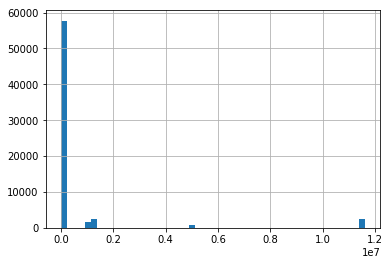

In [26]:
test['REP_POPULATION'].hist(bins=50);

In [90]:
len(df.columns)

22